In [183]:
import time
import numpy as np
import random
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [184]:
#create random input array 
testmatrix = np.zeros((1000, 1000), dtype = tuple)
colorgen = np.zeros(10000)
for i in range(1000):
    for j in range(1000):
        testmatrix[i][j] = (random.randint(4,16), random.randint(4,16))
playfeild = np.zeros((128, 128))

colorgen = np.arange(1,2000)
random.shuffle(colorgen)

In [185]:
#create our packing memory 
algoplayfeilds = []
for i in range(1000):
    algoplayfeilds.append(np.zeros([128,128]))

In [186]:
time_measure = time.time()
#starage for debug number 
for test in range(1000): 
    highest = 128 #checks how high the mound from mode 2 grew
    pack = 0 #number of rectangles in stack (used for debug not hardware)
    end_of_list = False #varaible that tells you if the mound growth has reached limit
    mode2 = False #varaible that tells you if mode 2 has started accumulating the mound 
    
    #dictionarty that keep tracks row growth in mode 1 and mode 2 
    y_cord = {16:[0,0, 0,0], 15:[16, 0, 16, 0], 14:[31,0, 31,0], 13:[45, 0, 45, 0],
          12:[58,0, 58,0], 11:[70, 0, 70, 0], 10:[81,0, 81,0], 9:[91, 0, 91, 0],
        8:[100,0, 100,0], 7:[108, 0, 108, 0], 6:[115,0, 115,0], 5:[121, 0, 121, 0],
          4:[0,0, 0,0]}
    
    #temporary storage for value computation 
    addcord = {5:[0,0], 6:[0,0], 7:[0,0], 8:[0,0], 9:[0,0], 10:[0,0], 11:[0,0],
               12:[0,0], 13:[0,0], 14:[0,0], 15:[0,0], 16:[0,0]}
    
    #main loop
    for index in range(1000):
         

        #switch case to check if the mound from mode2 has grown to interfere with any of the rows 
        if highest > 126:
            high_card = 5
        elif highest > 121:
            high_card = 6
        elif highest > 115:
            high_card = 7
        elif highest > 108:
            high_card = 8
        elif highest > 100:
            high_card = 9
        elif highest > 91:
            high_card = 10
        elif highest > 81:
            high_card = 11
        elif highest > 70:
            high_card = 12
        elif highest > 58:
            #check if a position is even possible 
            if sum(addcord[16]) + min(testmatrix[test][index][0], testmatrix[test][index][1]) > 127:
                break
            if sum(addcord[15]) + min(testmatrix[test][index][0], testmatrix[test][index][1]) > 127:
                break
            if sum(addcord[14]) + min(testmatrix[test][index][0], testmatrix[test][index][1]) > 127:
                break
            high_card = 13
        elif highest > 45:
            if sum(addcord[16]) + min(testmatrix[test][index][0], testmatrix[test][index][1]) > 127:
                break
            if sum(addcord[15]) + min(testmatrix[test][index][0], testmatrix[test][index][1]) > 127:
                break
            high_card = 14
        elif highest > 31:
            if sum(addcord[16]) + min(testmatrix[test][index][0], testmatrix[test][index][1]) > 127:
                break
            high_card = 15

        else: 
            high_card = 0 #varaible to tell you above which rows is still valid to enter into 


        direc = 0 #varaible for direction. 0 for left to right and 2 for right to left 
        ori = 1 #orientation of the data used in mode 2 

        length = min(testmatrix[test][index][0], testmatrix[test][index][1]) #set the length to the minimum edge

        height = max(testmatrix[test][index][0], testmatrix[test][index][1]) #set the height to max edge 

        if height == 4 or height == 5: #group height 4 and 5 together (least likely heights)
            row_cord = 5
        else:
            row_cord = height

        original_fill = addcord[row_cord] #get row fill lengths 

        #check bounds and if the row is valid else rotate and try again  
        if np.sum(addcord[row_cord]) + length < 128 and (row_cord > high_card  or mode2 == False):
            min_arg = np.argmin(original_fill)
            #if the row on the left is shorter add to that row
            if min_arg == 0:
                addcord[row_cord] = [addcord[row_cord][0] + length, addcord[row_cord][1]]
                direc = 0
            #if the row on the right is shorter add to that row 
            else:
                addcord[row_cord] = [addcord[row_cord][0], addcord[row_cord][1] + length]
                direc = 2
            #add to row
            for add_h in range(height): 
                for add_l in range(length):
                    new_h = y_cord[row_cord][direc]+add_h
                    if direc ==  0:                         
                        new_l = 127 - (y_cord[row_cord][direc+1]+add_l)
                    else:
                        new_l = y_cord[row_cord][direc+1]+add_l

                    if algoplayfeilds[test][new_h][new_l] != 0:
                        #debug
                        print("warning", new_h, new_l)
                    algoplayfeilds[test][new_h][new_l] = colorgen[index]
            y_cord[row_cord][direc+1] += length 

            #if it doesn't fit rotate orientation and try again (same operations)

        else:
            length = min(testmatrix[test][index][0], testmatrix[test][index][1])
            height = max(testmatrix[test][index][0], testmatrix[test][index][1])
            if height == 4 or height == 5:
                row_cord = 5
            else:
                row_cord = height
            original_fill = addcord[row_cord]
            if np.sum(addcord[row_cord]) + length < 128 and (row_cord > high_card or mode2 == False):
                min_arg = np.argmin(original_fill)
                if min_arg == 0:
                    addcord[row_cord] = [addcord[row_cord][0] + length, addcord[row_cord][1]]
                    direc = 0
                else:
                    addcord[row_cord] = [addcord[row_cord][0], addcord[row_cord][1] + length]
                    direc = 2

                for add_h in range(height): 
                    for add_l in range(length):
                        new_h = y_cord[row_cord][direc]+add_h
                        if direc ==  0:                         
                            new_l = 127 - (y_cord[row_cord][direc+1]+add_l)
                        else:
                            new_l = y_cord[row_cord][direc+1]+add_l

                        if algoplayfeilds[test][new_h][new_l] != 0:
                            print("warning", new_h, new_l)
                        algoplayfeilds[test][new_h][new_l] = colorgen[index]
                y_cord[row_cord][direc+1] += length 

            #if rotating didnt work, activate mode2 
            else:
                mode2 = True #mode two activation metric 
                placed_flag = False #tells if block has been placed 
                if end_of_list == False: #tells if mode2 has ran to limit 

                    for z in range(128): #first iteration loop bottom up 
                        i = 127 - z 
                        if placed_flag == True or end_of_list == True:
                            break

                        for y in range(128): #second loop 
                            #conditional, lateral search from center outwards 
                            if y%2 ==0:
                                j = 63 - y//2
                                ori = -1
                            else:
                                j = 64 +  y//2
                                ori = 1

                            if algoplayfeilds[test][i][j] == 0: #if empty spot is found 
                                check_flag = False #flag to tell if a overlap has been found 

                                #set height to min and length to max to bias stack to build shorter
                                height = min(testmatrix[test][index][0], testmatrix[test][index][1])
                                length = max(testmatrix[test][index][0], testmatrix[test][index][1]) 

                                #check bound
                                if (i - height) > 58 and (j + ori*length) < 128 and (j + ori*length) > 0:
                                    #check overlap 
                                    for height_iter in range(height):
                                        if check_flag == True:
                                            break
                                        for length_iter in range(length):
                                            if algoplayfeilds[test][i-height_iter][j+ori*length_iter] >= 1:
                                                check_flag = True
                                                break
                                else:
                                    check_flag = True
                                #if no operlaps found, place 
                                if check_flag == False: 
                                    placed_flag = True
                                    pack += 1
                                    highest = min(i - height, highest)
                                    for height_add in range(height):
                                        for length_add in range(length):  
                                            #debug
                                            if algoplayfeilds[test][i-height_add][j+ori*length_add] != 0:
                                                print("emergency!")
                                            algoplayfeilds[test][i-height_add][j+ori*length_add] = colorgen[pack]
                                    break


                            #stop at set height 50 to prevent interfereance with other row operations 
                            if i == 0 and j== 127:
                                end_of_list = True
                                break
                    else: 
                        high_card = 17 #insurance set 
                        break
timefinal = time.time() - time_measure 

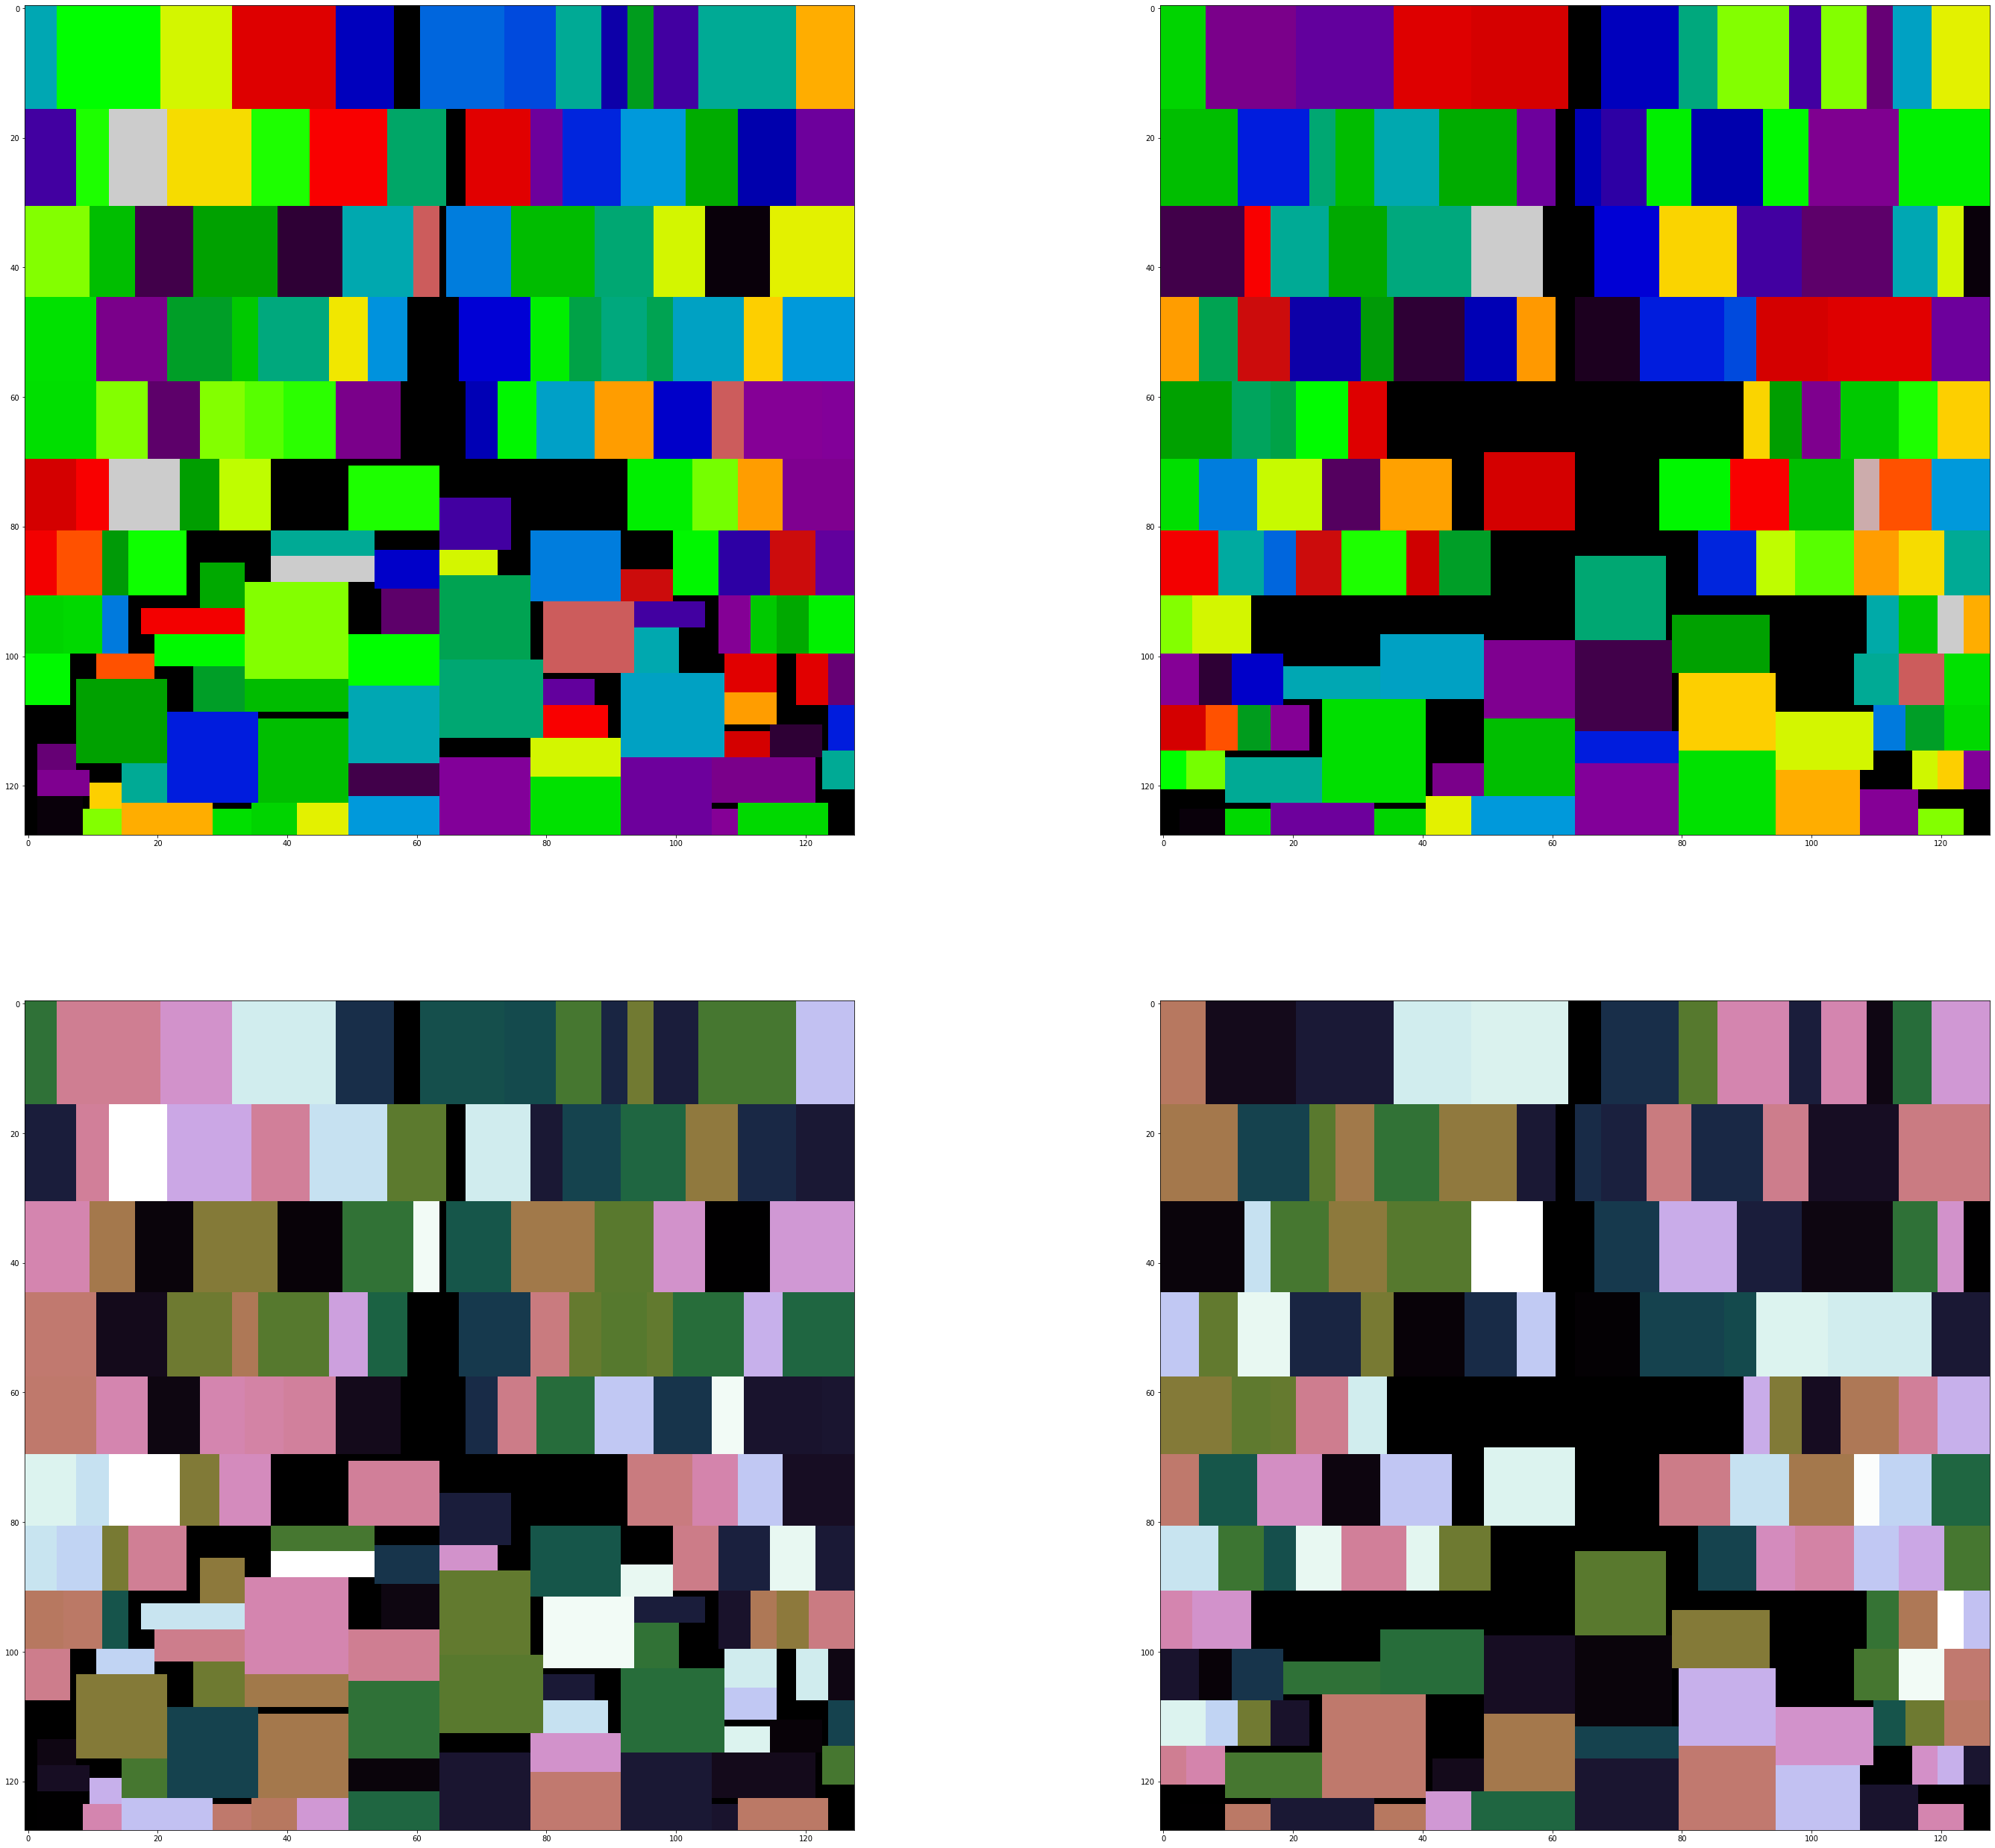

In [187]:
rows = 2 
columns = 2
fig = plt.figure(figsize=(50, 45))
fig.add_subplot(rows, columns, 1)
im = plt.imshow(algoplayfeilds[0], cmap = mpl.colormaps["nipy_spectral"])
fig.add_subplot(rows, columns, 2)
im = plt.imshow(algoplayfeilds[4], cmap = mpl.colormaps["nipy_spectral"])
fig.add_subplot(rows, columns, 3)
im = plt.imshow(algoplayfeilds[0], cmap = mpl.colormaps["cubehelix"])
fig.add_subplot(rows, columns, 4)
im = plt.imshow(algoplayfeilds[4], cmap = mpl.colormaps["cubehelix"])
plt.show()

In [188]:
#average behavor 
total_sum = 0
dist = np.zeros(250)
for test in range(250):
    summer = 0
    for i in range(128):
        for j in range(128): 
            if algoplayfeilds[test][i][j] == 0:
                summer += 1
                total_sum += 1
    dist[test] = (1 - summer/(128*128))
print(1 - total_sum/(128*128*250))

0.88941748046875


(array([ 1.,  0.,  0.,  1.,  4.,  1.,  2.,  6.,  6., 10., 17., 13., 30.,
        33., 23., 40., 22., 26., 14.,  1.]),
 array([0.76538086, 0.77441711, 0.78345337, 0.79248962, 0.80152588,
        0.81056213, 0.81959839, 0.82863464, 0.8376709 , 0.84670715,
        0.85574341, 0.86477966, 0.87381592, 0.88285217, 0.89188843,
        0.90092468, 0.90996094, 0.91899719, 0.92803345, 0.9370697 ,
        0.94610596]),
 <BarContainer object of 20 artists>)

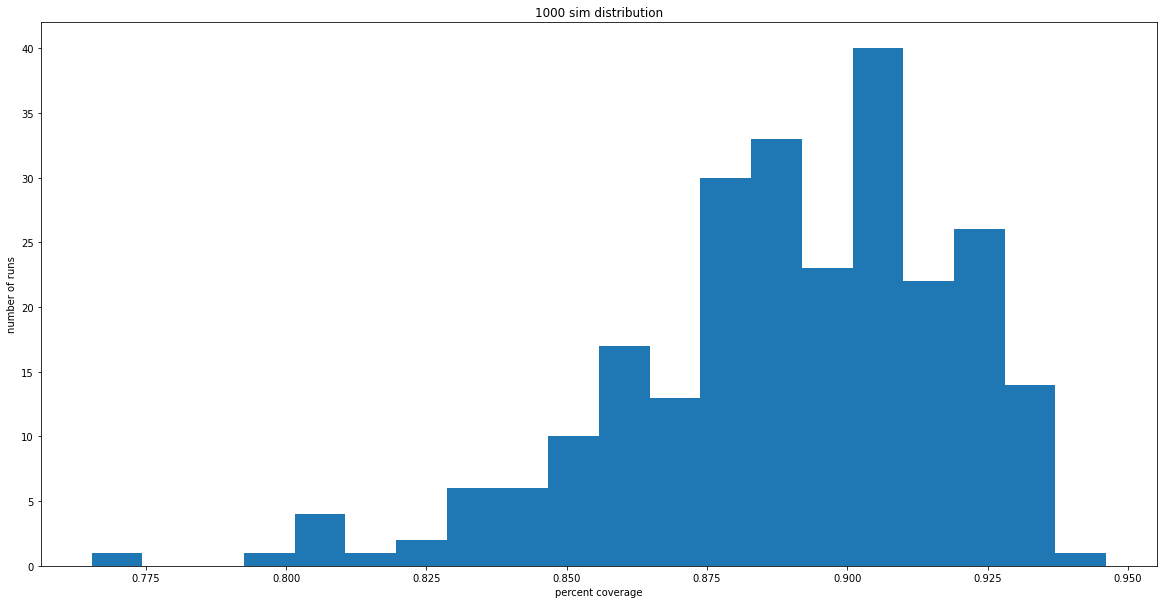

In [198]:
y =np.sort(dist)
fig = plt.figure(figsize=(20, 10))
plt.title("1000 sim distribution")
plt.xlabel("percent coverage")
plt.ylabel("number of runs")
plt.hist(y, 20)

In [200]:
print(np.std(dist), np.average(dist))

0.029277300675190594 0.88941748046875


In [193]:
print(0.8537068963050842/(timefinal/1000))

6.32743378399461


In [87]:
#create our packing memory 
algoplayfeilds = [np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                 np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                 np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                 np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                 np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                 np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                 np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                 np.zeros((128,128)), np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128)),
                  np.zeros((128,128)), np.zeros((128,128))]

In [88]:
#mode 1 only for demonstration only

#starage for debug number 
for test in range(100): 
    highest = 128 #checks how high the mound from mode 2 grew
    pack = 0 #number of rectangles in stack (used for debug not hardware)
    final_mode = 0 #variable to check if final mode (mode3) has been envoked (naive search mode)
    end_of_list = False #varaible that tells you if the mound growth has reached limit
    end_of_list2 = False #variable to tell you if naive implementation has reached limit
    mode2 = False #varaible taht tells you if mode 2 has started accumulating the mound 
    
    #dictionarty that keep tracks row growth in mode 1 and mode 2 
    y_cord = {16:[0,0, 0,0], 15:[16, 0, 16, 0], 14:[31,0, 31,0], 13:[45, 0, 45, 0],
          12:[58,0, 58,0], 11:[70, 0, 70, 0], 10:[81,0, 81,0], 9:[91, 0, 91, 0],
        8:[100,0, 100,0], 7:[108, 0, 108, 0], 6:[115,0, 115,0], 5:[121, 0, 121, 0],
          4:[0,0, 0,0]}
    
    #temporary storage for value computation 
    addcord = {5:[0,0], 6:[0,0], 7:[0,0], 8:[0,0], 9:[0,0], 10:[0,0], 11:[0,0],
               12:[0,0], 13:[0,0], 14:[0,0], 15:[0,0], 16:[0,0]}
    
    #main loop
    for index in range(1000):
        
        if final_mode  == 0: #check if mode 3 has been involked 
            
            #switch case to check if the mound from mode2 has grown to interfere with any of the rows 
            if highest > 126:
                high_card = 5
            elif highest > 121:
                high_card = 6
            elif highest > 115:
                high_card = 7
            elif highest > 108:
                high_card = 8
            elif highest > 100:
                high_card = 9
            elif highest > 91:
                high_card = 10
            elif highest > 81:
                high_card = 11
            elif highest > 70:
                high_card = 12
            elif highest > 58:
                high_card = 13
            elif highest > 45:
                high_card = 14
            else: 
                high_card = 12 #varaible to tell you above which rows is still valid to enter into 
            direc = 0 #varaible for direction. 0 for left to right and 2 for right to left 
            ori = 1 #orientation of the data used in mode 2 

            length = min(testmatrix[test][index][0], testmatrix[test][index][1]) #set the length to the minimum edge
            
            height = max(testmatrix[test][index][0], testmatrix[test][index][1]) #set the height to max edge 

            if height == 4 or height == 5: #group height 4 and 5 together (least likely heights)
                row_cord = 5
            else:
                row_cord = height
                
            original_fill = addcord[row_cord] #get row fill lengths 
            
            #check bounds and if the row is valid else rotate and try again  
            if np.sum(addcord[row_cord]) + length < 128 and (row_cord > high_card  or mode2 == False):
                min_arg = np.argmin(original_fill)
                #if the row on the left is shorter add to that row
                if min_arg == 0:
                    addcord[row_cord] = [addcord[row_cord][0] + length, addcord[row_cord][1]]
                    direc = 0
                #if the row on the right is shorter add to that row 
                else:
                    addcord[row_cord] = [addcord[row_cord][0], addcord[row_cord][1] + length]
                    direc = 2
                #add to row
                for add_h in range(height): 
                    for add_l in range(length):
                        new_h = y_cord[row_cord][direc]+add_h
                        if direc ==  0:                         
                            new_l = 127 - (y_cord[row_cord][direc+1]+add_l)
                        else:
                            new_l = y_cord[row_cord][direc+1]+add_l

                        if algoplayfeilds[test][new_h][new_l] != 0:
                            #debug
                            print("warning", new_h, new_l)
                        algoplayfeilds[test][new_h][new_l] = colorgen[index]
                y_cord[row_cord][direc+1] += length 

                #if it doesn't fit rotate orientation and try again (same operations)

            else:
                length = min(testmatrix[test][index][0], testmatrix[test][index][1])
                height = max(testmatrix[test][index][0], testmatrix[test][index][1])
                if height == 4 or height == 5:
                    row_cord = 5
                else:
                    row_cord = height
                original_fill = addcord[row_cord]
                if np.sum(addcord[row_cord]) + length < 128 and (row_cord > high_card or mode2 == False):
                    min_arg = np.argmin(original_fill)
                    if min_arg == 0:
                        addcord[row_cord] = [addcord[row_cord][0] + length, addcord[row_cord][1]]
                        direc = 0
                    else:
                        addcord[row_cord] = [addcord[row_cord][0], addcord[row_cord][1] + length]
                        direc = 2

                    for add_h in range(height): 
                        for add_l in range(length):
                            new_h = y_cord[row_cord][direc]+add_h
                            if direc ==  0:                         
                                new_l = 127 - (y_cord[row_cord][direc+1]+add_l)
                            else:
                                new_l = y_cord[row_cord][direc+1]+add_l

                            if algoplayfeilds[test][new_h][new_l] != 0:
                                print("warning", new_h, new_l)
                            algoplayfeilds[test][new_h][new_l] = colorgen[index]
                    y_cord[row_cord][direc+1] += length 

                #if rotating didnt work, activate mode2 
                else:
                    break

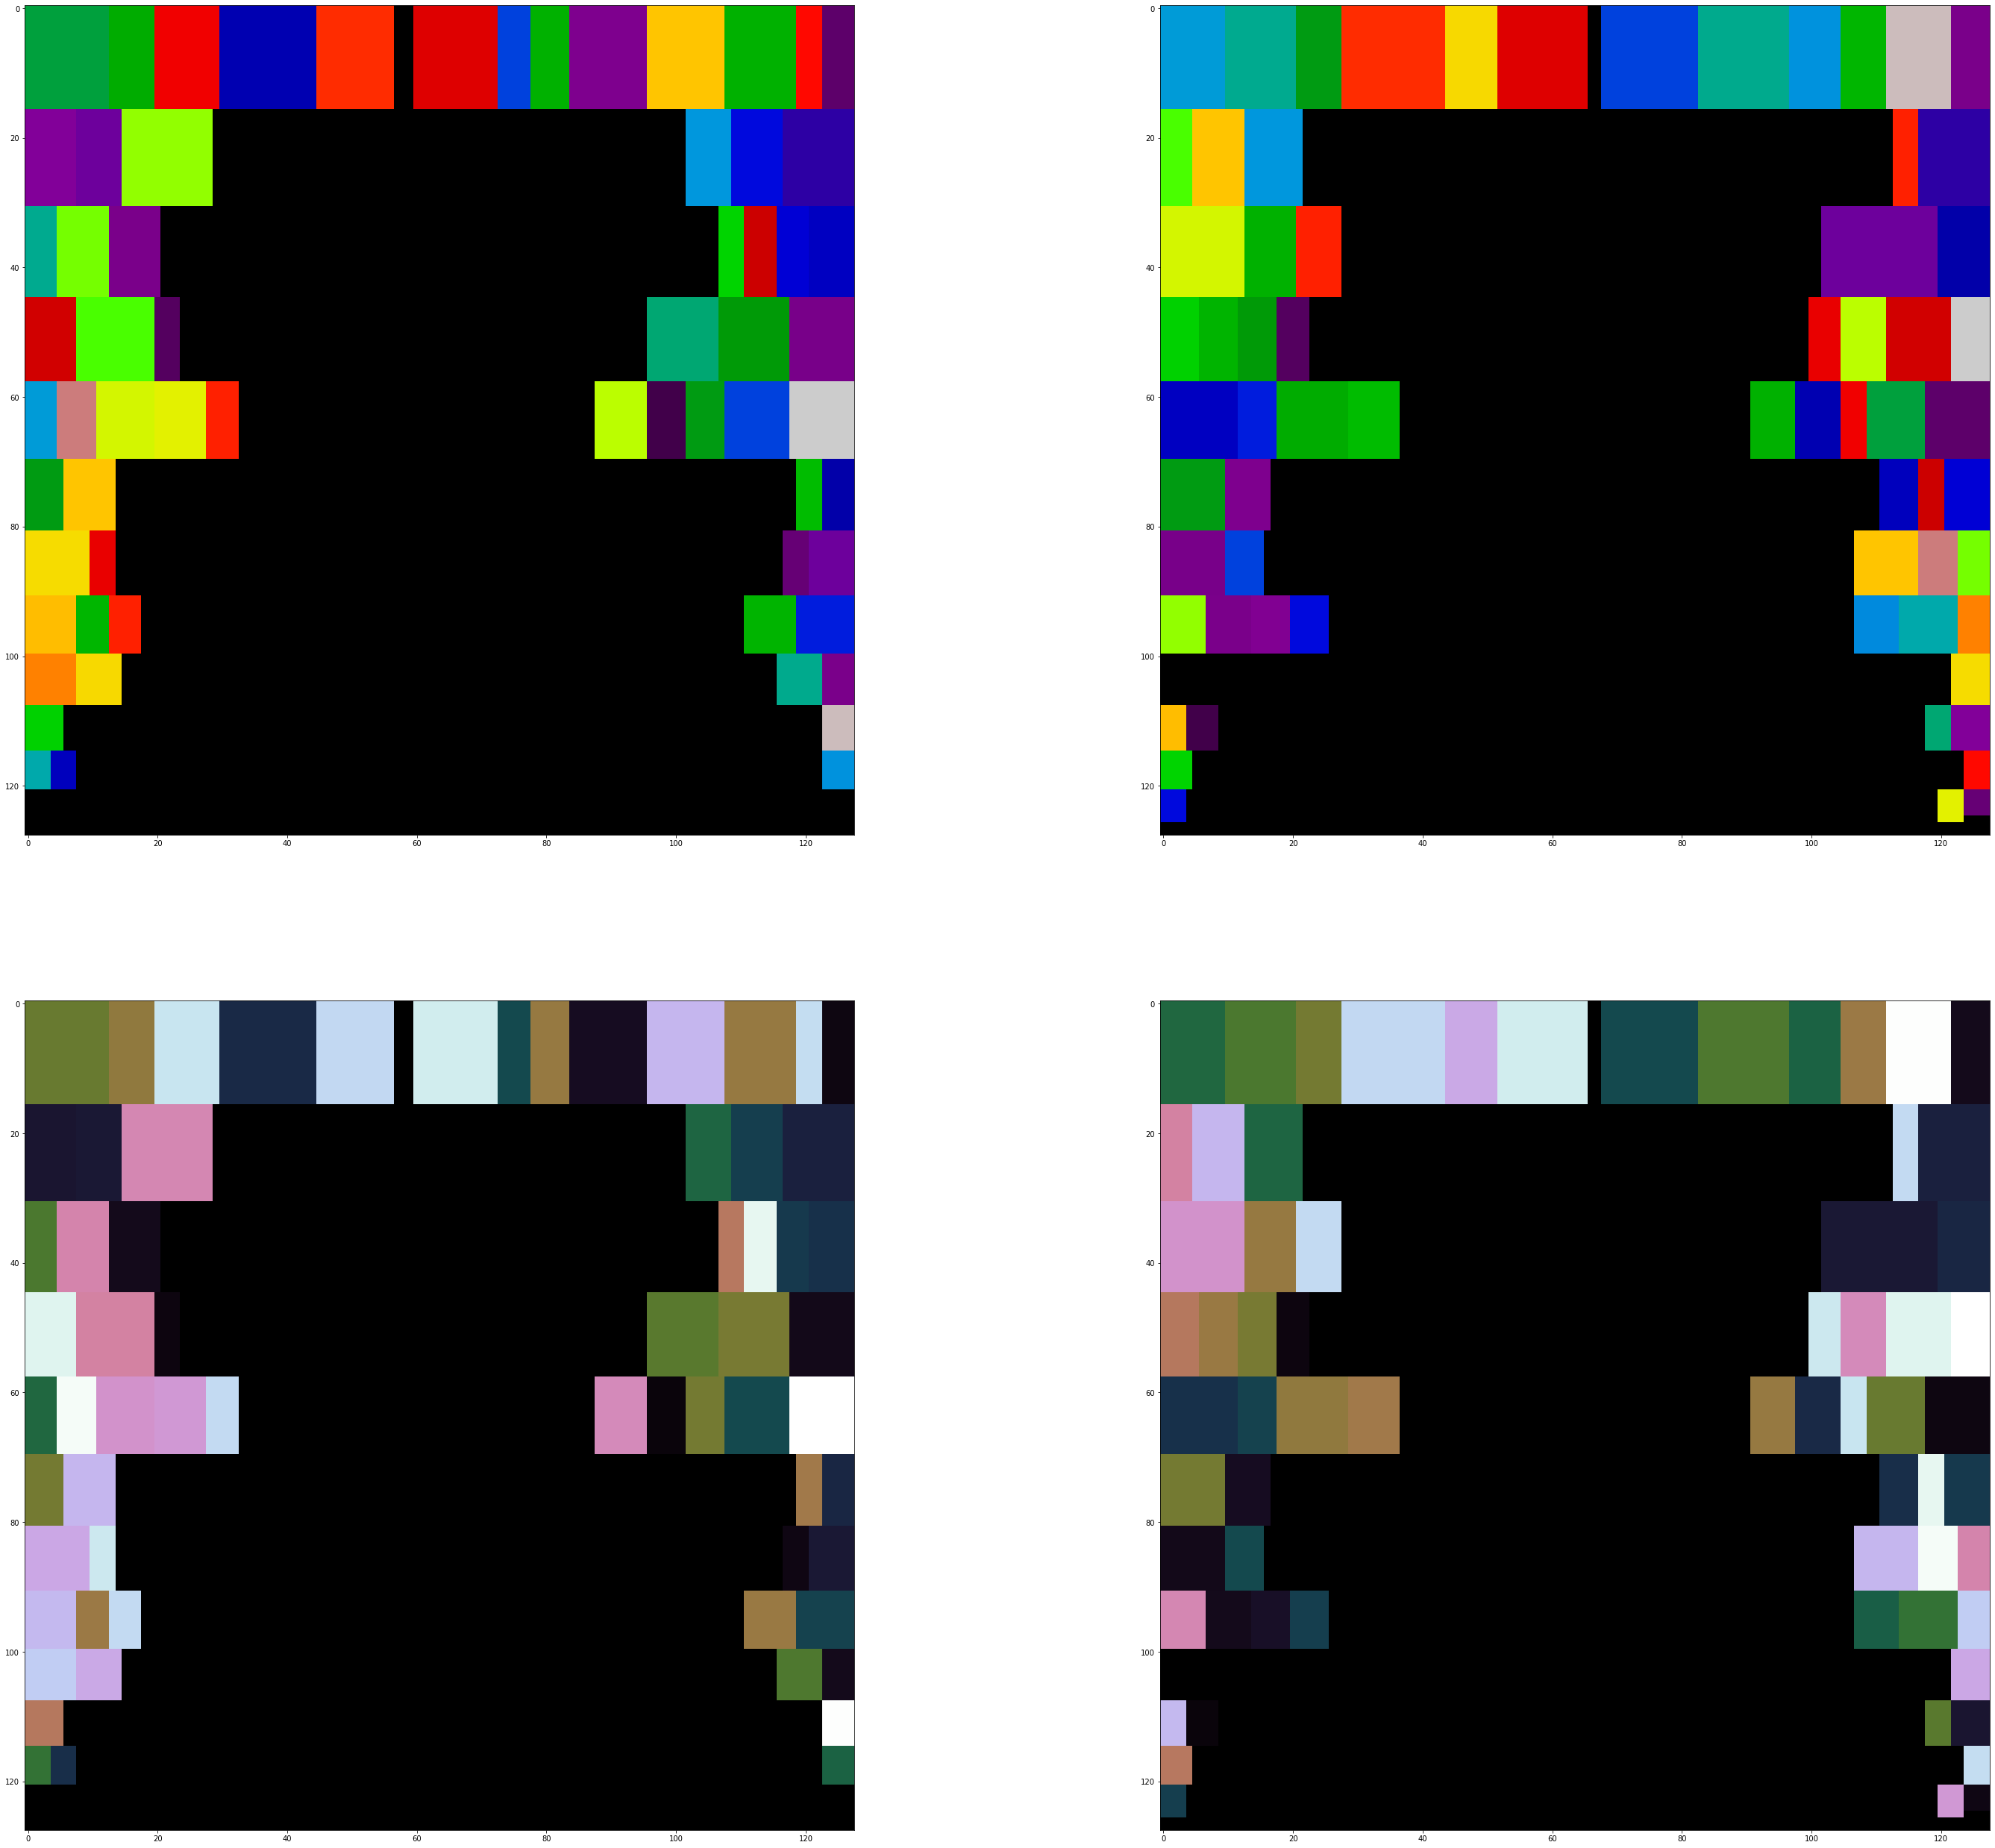

In [89]:
rows = 2 
columns = 2
fig = plt.figure(figsize=(50, 45))
fig.add_subplot(rows, columns, 1)
im = plt.imshow(algoplayfeilds[0], cmap = mpl.colormaps["nipy_spectral"])
fig.add_subplot(rows, columns, 2)
im = plt.imshow(algoplayfeilds[4], cmap = mpl.colormaps["nipy_spectral"])
fig.add_subplot(rows, columns, 3)
im = plt.imshow(algoplayfeilds[0], cmap = mpl.colormaps["cubehelix"])
fig.add_subplot(rows, columns, 4)
im = plt.imshow(algoplayfeilds[4], cmap = mpl.colormaps["cubehelix"])
plt.show()